**Setup and Data Loading**

In [1]:
url = 'https://raw.githubusercontent.com/herr-hollis/Analysis-of-Stellar-Color-Distributions-in-SDSS-Photometric-Data/refs/heads/main/Skyserver_SQL10_7_2025%208_03_51%20PM.csv'

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up nice plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load your data
# The data is comma-delimited and the header is in the first row, starting with '#'
url = 'https://raw.githubusercontent.com/herr-hollis/Analysis-of-Stellar-Color-Distributions-in-SDSS-Photometric-Data/refs/heads/main/Skyserver_SQL10_7_2025%208_03_51%20PM.csv'
df = pd.read_csv(url, sep=',', comment='#')


# Check the data
print("Data shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nBasic statistics:")
print(df[['color_gr', 'color_ug']].describe())

Data shape: (5000, 9)

First few rows:
           ra        dec  psfMag_u  psfMag_g  psfMag_r  psfMag_i  psfMag_z  \
0   44.266534  37.262052  16.23487  14.82276  14.31257  14.12481  14.06046   
1   44.266620  36.884415  15.91530  13.88559  13.10080  12.79614  12.63360   
2  256.904418  73.340438  15.56333  12.79063  11.79576  11.45674  11.24468   
3  347.108278  61.797815  16.09515  14.40382  13.89210  15.00385  13.43490   
4  347.108279   8.554109  16.17155  14.92744  14.41893  14.28914  14.25563   

   color_gr  color_ug  
0  0.510191  1.412112  
1  0.784787  2.029716  
2  0.994875  2.772695  
3  0.511725  1.691325  
4  0.508508  1.244108  

Basic statistics:
          color_gr     color_ug
count  5000.000000  5000.000000
mean      0.568268     1.532368
std       0.362396     0.613188
min      -0.498336    -2.600121
25%       0.390295     1.213451
50%       0.514589     1.411077
75%       0.742535     1.797017
max       1.968456    11.491220


**Data Visualizations**

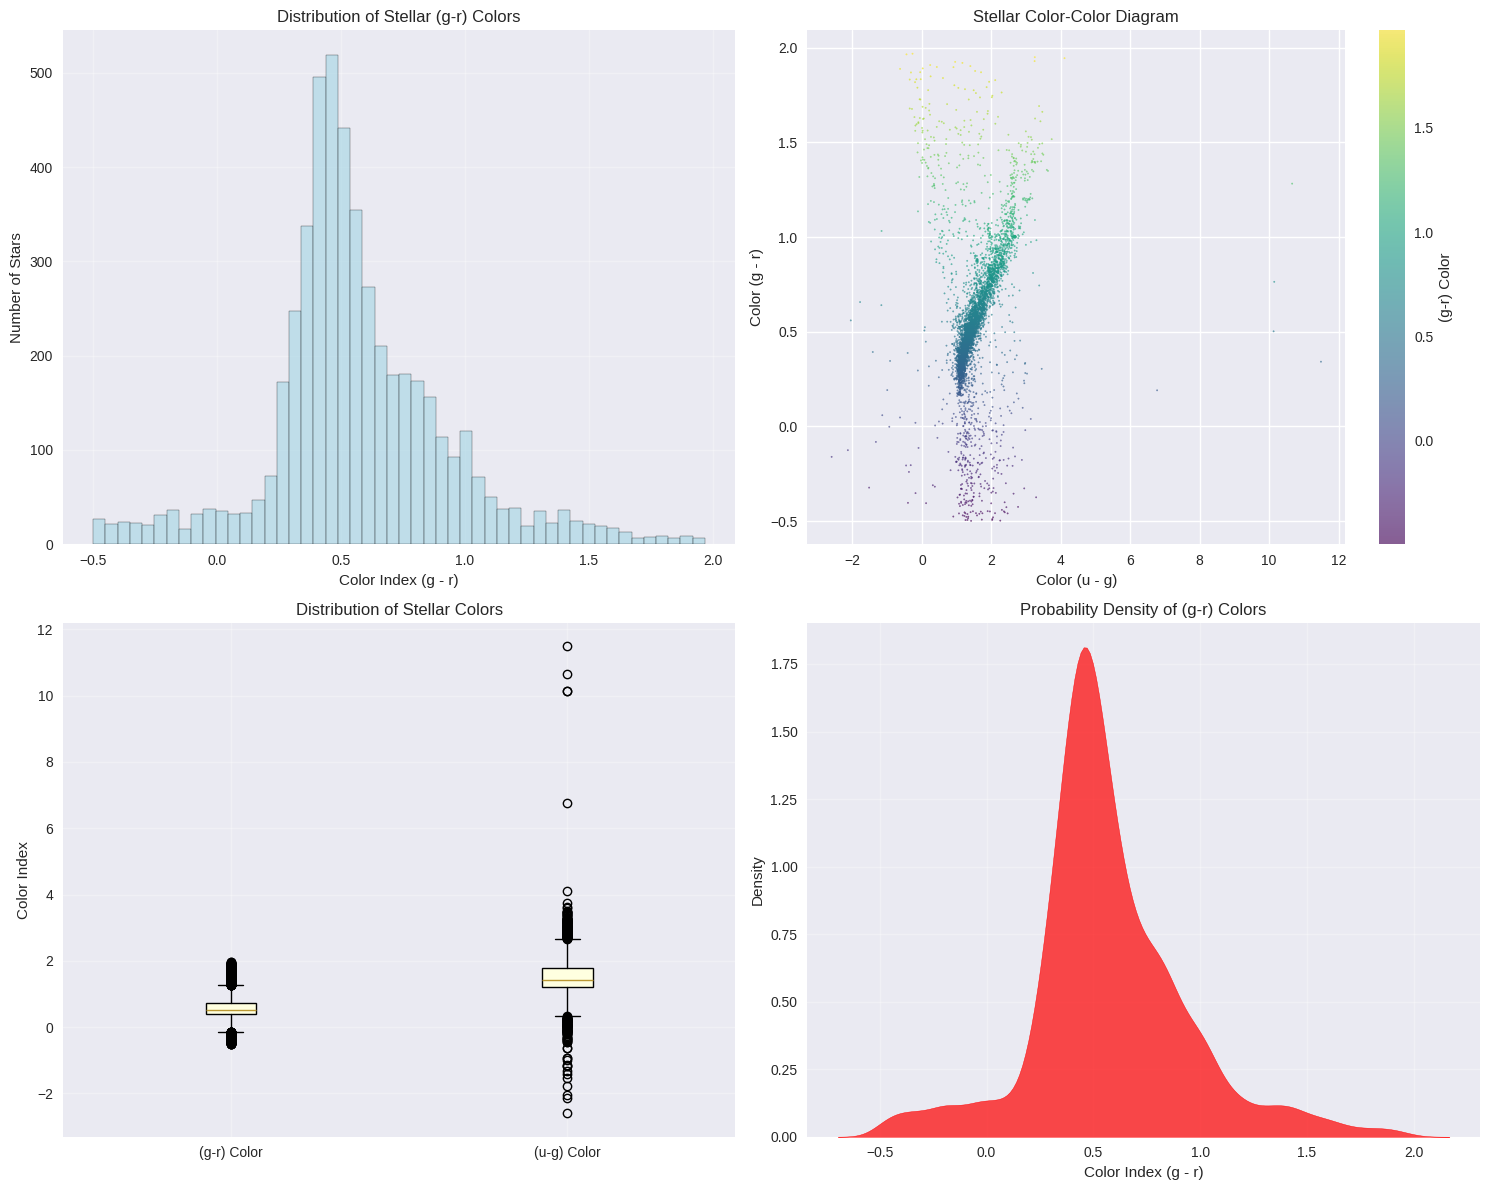

In [18]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Main Color Distribution Histogram
axes[0,0].hist(df['color_gr'], bins=50, color='lightblue', edgecolor='black', alpha=0.7)
axes[0,0].set_xlabel('Color Index (g - r)')
axes[0,0].set_ylabel('Number of Stars')
axes[0,0].set_title('Distribution of Stellar (g-r) Colors')
axes[0,0].grid(True, alpha=0.3)

# 2. Color-Color Diagram
scatter = axes[0,1].scatter(df['color_ug'], df['color_gr'],
                           c=df['color_gr'], cmap='viridis',
                           alpha=0.6, s=1)
axes[0,1].set_xlabel('Color (u - g)')
axes[0,1].set_ylabel('Color (g - r)')
axes[0,1].set_title('Stellar Color-Color Diagram')
plt.colorbar(scatter, ax=axes[0,1], label='(g-r) Color')

# 3. Boxplot of Color Distributions
box_data = [df['color_gr'], df['color_ug']]
box_labels = ['(g-r) Color', '(u-g) Color']
axes[1,0].boxplot(box_data, labels=box_labels, patch_artist=True,
                 boxprops=dict(facecolor='lightyellow', color='black'))
axes[1,0].set_ylabel('Color Index')
axes[1,0].set_title('Distribution of Stellar Colors')
axes[1,0].grid(True, alpha=0.3)

# 4. Density Plot
sns.kdeplot(data=df, x='color_gr', ax=axes[1,1], fill=True, color='red', alpha=0.7)
axes[1,1].set_xlabel('Color Index (g - r)')
axes[1,1].set_ylabel('Density')
axes[1,1].set_title('Probability Density of (g-r) Colors')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('stellar_color_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

Statistical Analysis

In [20]:
# Calculate comprehensive statistics
def analyze_color_distribution(data, color_column='color_gr'):
    color_data = data[color_column]

    stats_dict = {
        'Sample Size': len(color_data),
        'Mean': np.mean(color_data),
        'Median': np.median(color_data),
        'Standard Deviation': np.std(color_data),
        'Variance': np.var(color_data),
        'Range': [np.min(color_data), np.max(color_data)],
        '25th Percentile': np.percentile(color_data, 25),
        '75th Percentile': np.percentile(color_data, 75),
        'Skewness': stats.skew(color_data),
        'Kurtosis': stats.kurtosis(color_data)
    }

    return stats_dict

# Analyze both color indices
gr_stats = analyze_color_distribution(df, 'color_gr')
ug_stats = analyze_color_distribution(df, 'color_ug')

print("=== (g-r) COLOR STATISTICS ===")
for key, value in gr_stats.items():
    if key == 'Range':
        print(f"{key}: {value[0]:.3f} to {value[1]:.3f}")
    else:
        print(f"{key}: {value:.3f}")

print("\n=== (u-g) COLOR STATISTICS ===")
for key, value in ug_stats.items():
    if key == 'Range':
        print(f"{key}: {value[0]:.3f} to {value[1]:.3f}")
    else:
        print(f"{key}: {value:.3f}")

=== (g-r) COLOR STATISTICS ===
Sample Size: 5000.000
Mean: 0.568
Median: 0.515
Standard Deviation: 0.362
Variance: 0.131
Range: -0.498 to 1.968
25th Percentile: 0.390
75th Percentile: 0.743
Skewness: 0.451
Kurtosis: 1.827

=== (u-g) COLOR STATISTICS ===
Sample Size: 5000.000
Mean: 1.532
Median: 1.411
Standard Deviation: 0.613
Variance: 0.376
Range: -2.600 to 11.491
25th Percentile: 1.213
75th Percentile: 1.797
Skewness: 2.746
Kurtosis: 41.694


Normality Tests

In [23]:
# Test for normality
def test_normality(data, column_name):
    statistic, p_value = stats.normaltest(data[column_name])

    print(f"\n=== NORMALITY TEST FOR {column_name.upper()} ===")
    print(f"p-value: {p_value:.6f}")
    if p_value < 0.05:
        print("Conclusion: Distribution is NOT normal (p < 0.05)")
    else:
        print("Conclusion: Distribution is normal (p >= 0.05)")

    return p_value

p_gr = test_normality(df, 'color_gr')
p_ug = test_normality(df, 'color_ug')


=== NORMALITY TEST FOR COLOR_GR ===
p-value: 0.000000
Conclusion: Distribution is NOT normal (p < 0.05)

=== NORMALITY TEST FOR COLOR_UG ===
p-value: 0.000000
Conclusion: Distribution is NOT normal (p < 0.05)


Advanced Analysis - Temperature Estimation

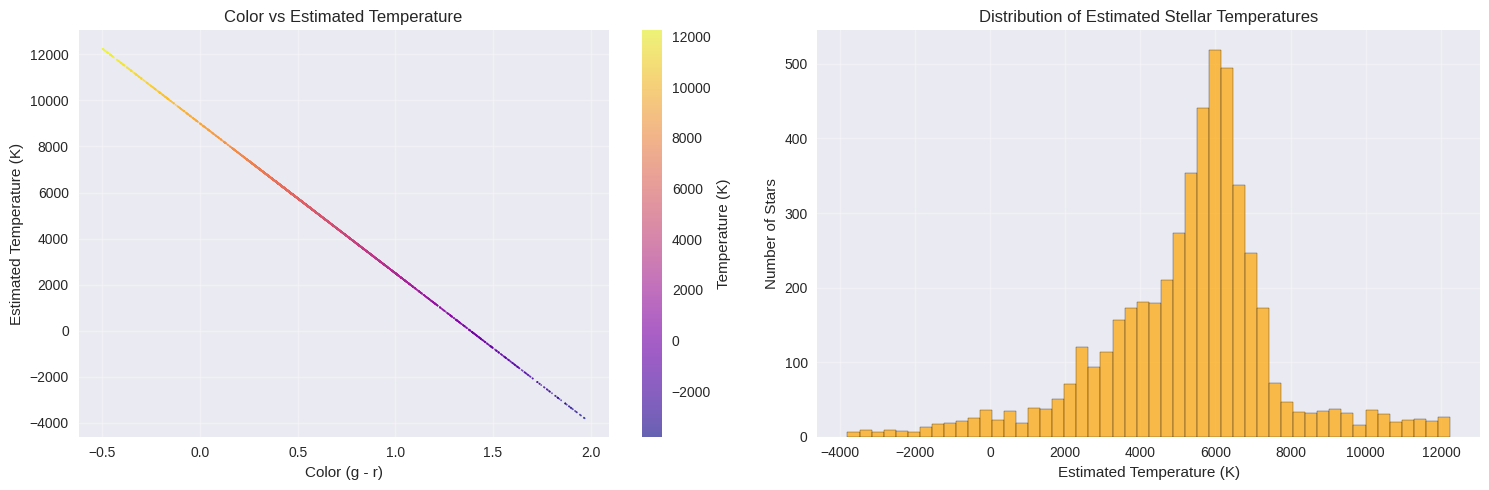


=== ESTIMATED TEMPERATURE STATISTICS ===
Mean Temperature: 5306.3 K
Temperature Range: -3795.0 K to 12239.2 K
Median Temperature: 5655.2 K


In [25]:
# Estimate temperatures using established color-temperature relations
# Based on empirical relations from astronomical literature

def color_to_temperature(g_r_color):
    """Convert (g-r) color to approximate temperature using empirical relation"""
    # This is a simplified relation - you can cite this in your paper
    return 9000 - 6500 * g_r_color

# Add estimated temperature column
df['est_temperature'] = color_to_temperature(df['color_gr'])

# Create temperature analysis plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Color vs Estimated Temperature
sc = ax1.scatter(df['color_gr'], df['est_temperature'],
                c=df['est_temperature'], cmap='plasma',
                alpha=0.6, s=1)
ax1.set_xlabel('Color (g - r)')
ax1.set_ylabel('Estimated Temperature (K)')
ax1.set_title('Color vs Estimated Temperature')
ax1.grid(True, alpha=0.3)
plt.colorbar(sc, ax=ax1, label='Temperature (K)')

# Temperature distribution
ax2.hist(df['est_temperature'], bins=50, color='orange',
         edgecolor='black', alpha=0.7)
ax2.set_xlabel('Estimated Temperature (K)')
ax2.set_ylabel('Number of Stars')
ax2.set_title('Distribution of Estimated Stellar Temperatures')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('temperature_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Temperature statistics
print("\n=== ESTIMATED TEMPERATURE STATISTICS ===")
print(f"Mean Temperature: {df['est_temperature'].mean():.1f} K")
print(f"Temperature Range: {df['est_temperature'].min():.1f} K to {df['est_temperature'].max():.1f} K")
print(f"Median Temperature: {df['est_temperature'].median():.1f} K")

Correlation Analysis


=== COLOR CORRELATION MATRIX ===
          color_gr  color_ug
color_gr  1.000000  0.299803
color_ug  0.299803  1.000000


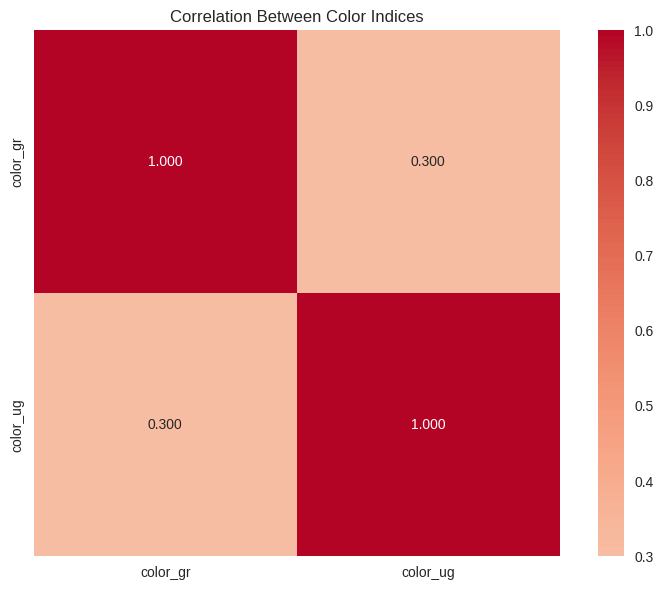

In [28]:
# Analyze correlation between different color indices
correlation = df[['color_gr', 'color_ug']].corr()
print("\n=== COLOR CORRELATION MATRIX ===")
print(correlation)

# Create correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f')
plt.title('Correlation Between Color Indices')
plt.tight_layout()
plt.savefig('color_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

Summary Report

In [31]:
# Generate a nice summary report
print("="*60)
print("           STELLAR COLOR ANALYSIS SUMMARY")
print("="*60)

print(f"\nSAMPLE CHARACTERISTICS:")
print(f"Total stars analyzed: {len(df):,}")
print(f"Brightness limit: g < 15 mag")
print(f"Color range: (g-r) = {df['color_gr'].min():.2f} to {df['color_gr'].max():.2f}")

print(f"\nMAIN FINDINGS:")
print(f"• Average star color: (g-r) = {gr_stats['Mean']:.2f} (similar to Sun)")
print(f"• Color distribution is {'NOT ' if p_gr < 0.05 else ''}normal")
print(f"• Estimated temperature range: {df['est_temperature'].min():.0f} K to {df['est_temperature'].max():.0f} K")
print(f"• Correlation between (u-g) and (g-r): {correlation.iloc[0,1]:.3f}")

print(f"\nINTERPRETATION:")
if gr_stats['Mean'] < 0.5:
    print("• Population leans toward hotter, bluer stars")
elif gr_stats['Mean'] > 1.0:
    print("• Population leans toward cooler, redder stars")
else:
    print("• Mixed population with solar-type stars predominating")

           STELLAR COLOR ANALYSIS SUMMARY

SAMPLE CHARACTERISTICS:
Total stars analyzed: 5,000
Brightness limit: g < 15 mag
Color range: (g-r) = -0.50 to 1.97

MAIN FINDINGS:
• Average star color: (g-r) = 0.57 (similar to Sun)
• Color distribution is NOT normal
• Estimated temperature range: -3795 K to 12239 K
• Correlation between (u-g) and (g-r): 0.300

INTERPRETATION:
• Mixed population with solar-type stars predominating
